## Afiniti Weather Assesment

### Importing libraries and metrics

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, make_scorer
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score,  classification_report,mean_squared_error  
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

### Importing source data into Pandas DataFrame

In [2]:
data = pd.read_csv('weather_h.csv')

### First look at data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 11972 non-null  int64  
 1   summary              11972 non-null  object 
 2   icon                 11972 non-null  object 
 3   precipIntensity      10980 non-null  float64
 4   precipProbability    10980 non-null  float64
 5   temperature          11972 non-null  float64
 6   apparentTemperature  11972 non-null  float64
 7   dewPoint             11972 non-null  float64
 8   humidity             11972 non-null  float64
 9   windSpeed            11966 non-null  float64
 10  windGust             10998 non-null  float64
 11  windBearing          11836 non-null  float64
 12  cloudCover           8935 non-null   float64
 13  uvIndex              10596 non-null  float64
 14  visibility           11963 non-null  float64
 15  precipType           3013 non-null  

In [4]:
data.head()

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,...,uvIndex,visibility,precipType,precipAccumulation,pressure,ozone,isocal,id_poi,hour,day
0,1483225200,Overcast,cloudy,0.0,0.0,3.072222,0.161111,34.69,0.89,6.79,...,0.0,6.216,NaN,NaN,NaN,NaN,52-07T00,1,0,2017-01-01
1,1483228800,Mostly Cloudy,partly-cloudy-night,0.0,0.0,3.238889,0.561111,34.20,0.87,6.24,...,0.0,5.173,NaN,NaN,NaN,NaN,52-07T01,1,1,2017-01-01
2,1483232400,Mostly Cloudy,partly-cloudy-night,0.0,0.0,2.938889,-0.050000,32.87,0.84,6.94,...,0.0,4.830,NaN,NaN,NaN,NaN,52-07T02,1,2,2017-01-01
3,1483236000,Overcast,cloudy,0.0,0.0,2.738889,-0.366667,32.46,0.84,7.17,...,0.0,6.216,NaN,NaN,NaN,NaN,52-07T03,1,3,2017-01-01
4,1483239600,Overcast,cloudy,0.0,0.0,2.838889,-0.144444,32.62,0.84,6.86,...,0.0,6.216,NaN,NaN,NaN,NaN,52-07T04,1,4,2017-01-01


In [5]:
data.describe()

,time,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipAccumulation,pressure,ozone,id_poi,hour
count,1.197200e+04,10980.000000,10980.000000,11972.000000,11972.000000,11972.000000,11972.000000,11966.000000,10998.000000,11836.000000,8935.000000,10596.000000,11963.000000,69.000000,2220.000000,2220.000000,11972.0,11972.000000
mean,1.510131e+09,0.001589,0.059299,10.562512,9.497803,42.925616,0.762709,6.321073,10.424684,198.216881,0.643961,0.619102,5.805698,0.022172,1018.794104,296.817568,1.0,11.497411
std,2.005263e+07,0.008051,0.166139,7.563293,8.643471,10.640963,0.163704,3.852841,7.207057,83.723333,0.255871,1.319999,1.144890,0.032754,8.694275,25.724094,0.0,6.922817
min,1.483225e+09,0.000000,0.000000,-9.788889,-12.811111,11.280000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079000,0.001300,988.310000,242.700000,1.0,0.000000
25%,1.493999e+09,0.000000,0.000000,4.766667,2.366667,34.917500,0.660000,3.600000,5.222500,132.000000,0.570000,0.000000,6.216000,0.003100,1013.875000,278.300000,1.0,5.000000
50%,1.504773e+09,0.000000,0.000000,10.147222,10.147222,43.580000,0.810000,5.670000,8.990000,219.000000,0.750000,0.000000,6.216000,0.008000,1019.385000,294.950000,1.0,11.000000
75%,1.535505e+09,0.000000,0.000000,16.116667,16.116667,50.792500,0.890000,8.360000,13.557500,265.000000,0.750000,0.000000,6.216000,0.021900,1025.252500,316.450000,1.0,17.000000
max,1.546294e+09,0.217400,0.850000,33.983333,33.983333,69.880000,1.000000,27.080000,45.260000,359.000000,1.000000,8.000000,10.000000,0.153200,1039.150000,361.300000,1.0,23.000000


### Feature engineering

#### Passing  through categorical variables

In [6]:
encoder = LabelEncoder()
data['summary'] = encoder.fit_transform(data.summary.values)
data['isocal'] = encoder.fit_transform(data.isocal.values)

#### Extracting month from day

In [7]:
data['month'] = pd.to_datetime(data['day'], format='%Y-%m-%d' ).dt.month

#### Creating target variable "rain" based on precipType

In [8]:
data.precipType.unique()

array([nan, 'snow', 'rain', 'sleet'], dtype=object)

In [9]:
def func(row):
    if row['precipType'] == 'rain':
        return 1
    else:
        return 0

data['rain'] = data.apply(func, axis=1)

#### Understanding distro of the target variable (rain )

In [10]:
data.rain.unique()

array([0, 1], dtype=int64)

In [11]:
data['rain'].value_counts()

0    9036
1    2936
Name: rain, dtype: int64

### EDA 


#### Dropping unneeded vars

In [12]:
data.drop('time', axis=1, inplace=True)
data.drop('precipType', axis=1, inplace=True)
data.drop('id_poi', axis=1, inplace=True)
data.drop('isocal', axis=1, inplace=True)
data.drop('day', axis=1, inplace=True)
data.drop('precipAccumulation', axis=1, inplace=True)
data.drop('icon', axis=1, inplace=True)
data.drop('apparentTemperature', axis=1, inplace=True)


### Dropping 3variables that will lead to overfitting and won`t let the models learn

In [13]:
data.drop('precipProbability', axis=1, inplace=True)
data.drop('precipIntensity', axis=1, inplace=True)
data.drop('summary', axis=1, inplace=True)


#### Searching null values
 

In [14]:
data.isna().sum()

temperature       0
dewPoint          0
humidity          0
windSpeed         6
windGust        974
windBearing     136
cloudCover     3037
uvIndex        1376
visibility        9
pressure       9752
ozone          9752
hour              0
month             0
rain              0
dtype: int64

#### Replacing null values 

In [15]:
#data[['precipIntensity']] = data[['precipIntensity']].fillna(0) 
#data[['precipProbability']] = data[['precipProbability']].fillna(0) 

data[['windSpeed']] = data[['windSpeed']].fillna(data['windSpeed'].mean()) 
data[['windGust']] = data[['windGust']].fillna(data['windGust'].mean()) 
data[['windBearing']] = data[['windBearing']].fillna(data['windBearing'].mean()) 
data[['uvIndex']] = data[['uvIndex']].fillna(data['uvIndex'].mean()) 
data[['cloudCover']] = data[['cloudCover']].fillna(data['cloudCover'].mean()) 
data[['visibility']] = data[['visibility']].fillna(data['visibility'].mean()) 
data[['pressure']] = data[['pressure']].fillna(data['pressure'].mean()) 
data[['ozone']] = data[['ozone']].fillna(data['ozone'].mean()) 


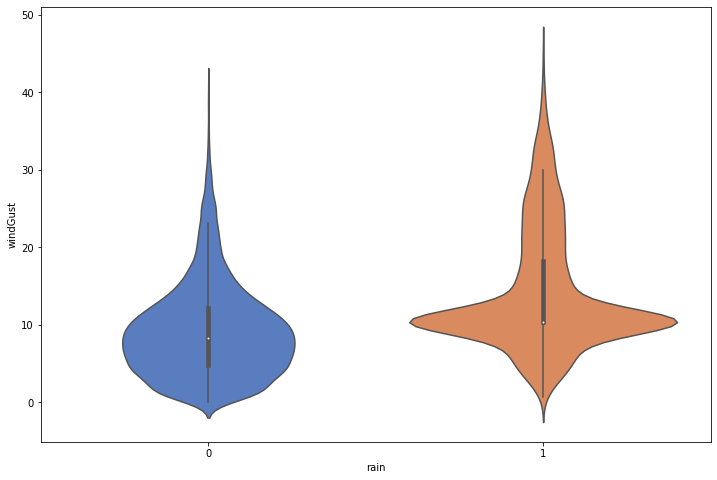

In [16]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.violinplot(x="rain", y="windGust",data=data, palette="muted")

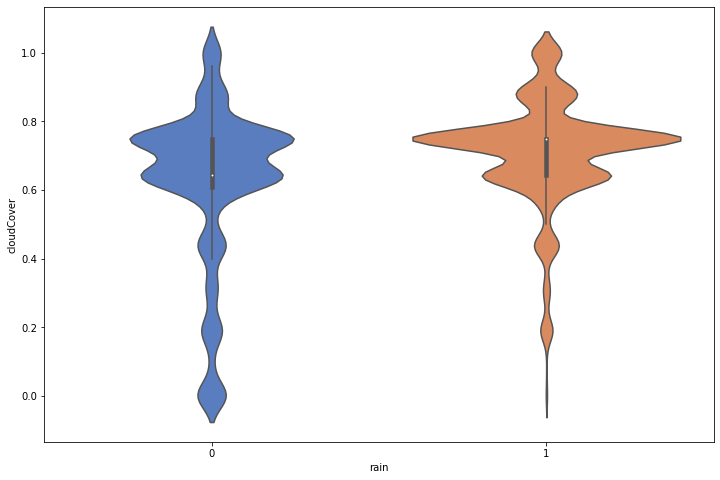

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.violinplot(x="rain", y="cloudCover",data=data, palette="muted")

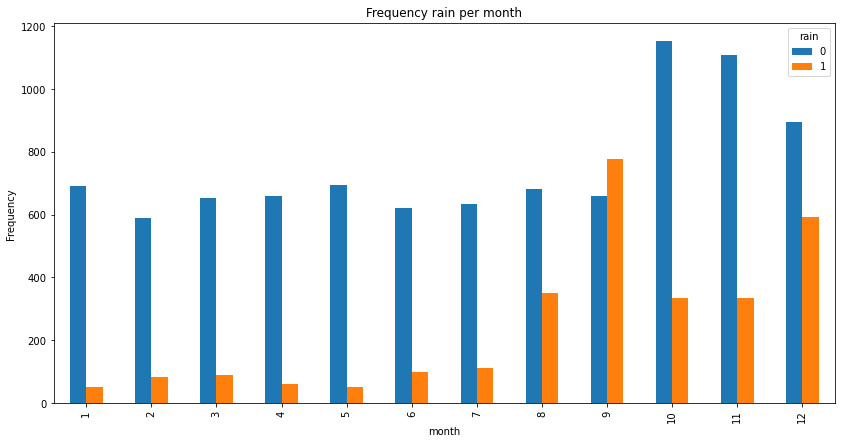

In [18]:
%matplotlib inline
pd.crosstab(data.month,data.rain).plot(kind='bar',figsize=(14, 7))
plt.title('Frequency rain per month')
plt.xlabel('month')
plt.ylabel('Frequency ')
plt.show()

<Figure size 432x288 with 0 Axes>

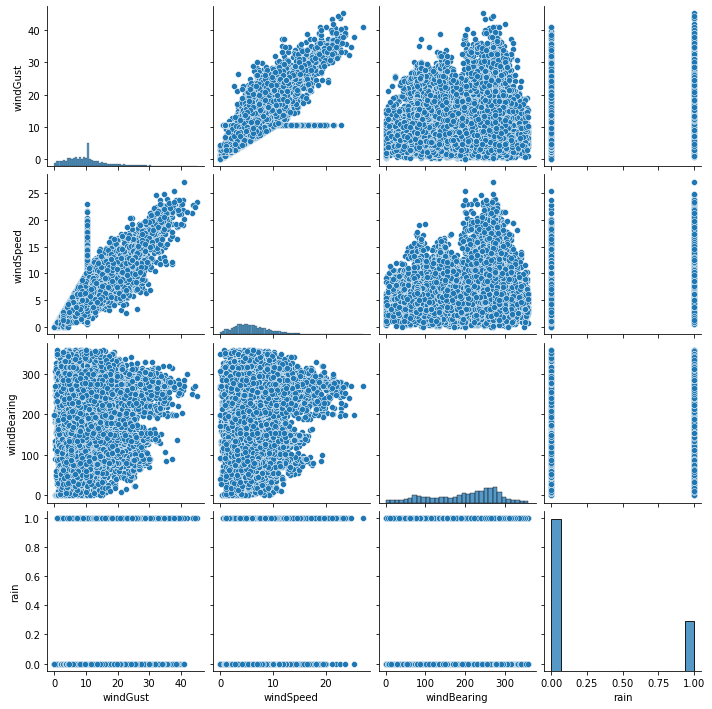

In [19]:
plt.figure()
sns.pairplot(data=data[["windGust",
                        "windSpeed",
                        "windBearing",
                        "rain"
                                              ]])

<AxesSubplot:>

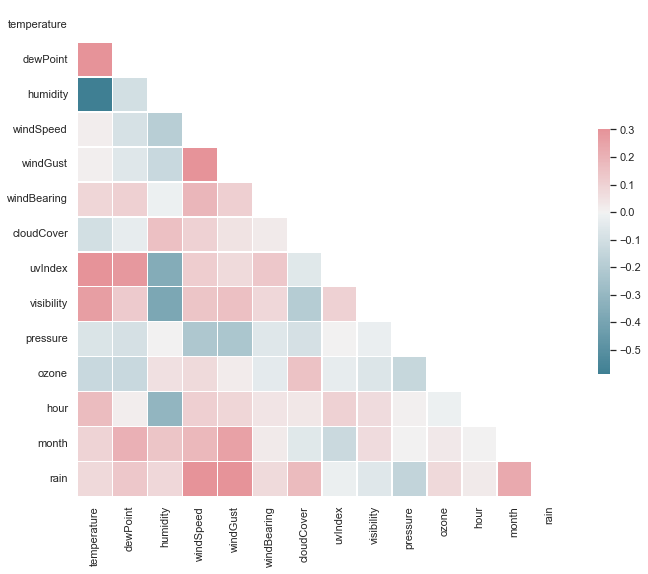

In [20]:
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  11972 non-null  float64
 1   dewPoint     11972 non-null  float64
 2   humidity     11972 non-null  float64
 3   windSpeed    11972 non-null  float64
 4   windGust     11972 non-null  float64
 5   windBearing  11972 non-null  float64
 6   cloudCover   11972 non-null  float64
 7   uvIndex      11972 non-null  float64
 8   visibility   11972 non-null  float64
 9   pressure     11972 non-null  float64
 10  ozone        11972 non-null  float64
 11  hour         11972 non-null  int64  
 12  month        11972 non-null  int64  
 13  rain         11972 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 1.3 MB


In [22]:
data.head()

,temperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,pressure,ozone,hour,month,rain
0,3.072222,34.69,0.89,6.79,9.05,202.0,0.89,0.0,6.216,1018.794104,296.817568,0,1,0
1,3.238889,34.20,0.87,6.24,9.05,211.0,0.75,0.0,5.173,1018.794104,296.817568,1,1,0
2,2.938889,32.87,0.84,6.94,10.44,210.0,0.75,0.0,4.830,1018.794104,296.817568,2,1,0
3,2.738889,32.46,0.84,7.17,9.90,218.0,0.89,0.0,6.216,1018.794104,296.817568,3,1,0
4,2.838889,32.62,0.84,6.86,7.66,216.0,0.89,0.0,6.216,1018.794104,296.817568,4,1,0


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[[ 'temperature'
      , 'dewPoint', 'windSpeed', 'windGust'
      ,'windBearing', 'uvIndex', 'visibility'
      , 'pressure', 'ozone']] = scaler.fit_transform(data[[ 'temperature'
                                                           , 'dewPoint', 'windSpeed', 'windGust'
                                                           ,'windBearing', 'uvIndex', 'visibility'
                                                           , 'pressure', 'ozone']])

<AxesSubplot:>

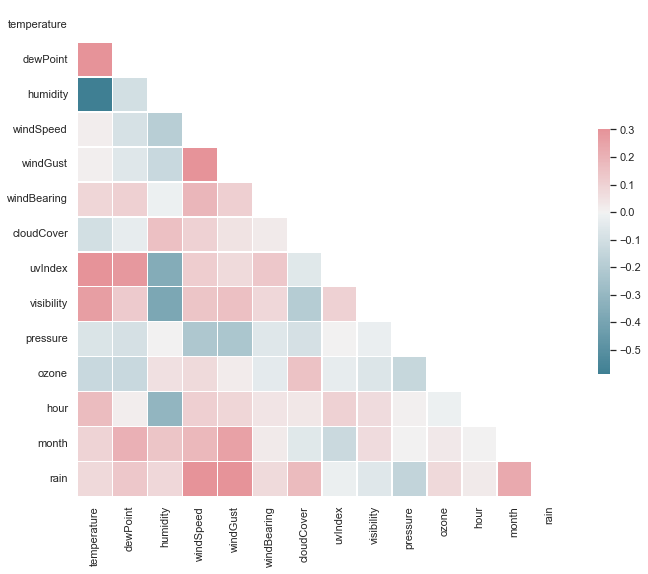

In [24]:
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Set target 

In [25]:
y = data['rain']
X = data.drop(['rain'], axis=1)


In [26]:
x_train, x_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.33, random_state=123)

 ## Logistic Regression

In [27]:
logreg = LogisticRegression(C=1.0, class_weight=None)
logreg.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [29]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2861  158]
 [ 642  290]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3019
           1       0.65      0.31      0.42       932

    accuracy                           0.80      3951
   macro avg       0.73      0.63      0.65      3951
weighted avg       0.78      0.80      0.77      3951



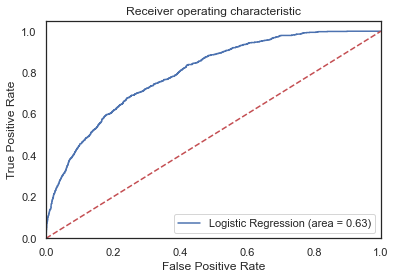

In [31]:

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_Log_Reg')
plt.show()

###  XGBoost


In [32]:
%%capture output
from time import time
gbm = xgb.XGBRegressor( 
                       n_estimators=3000, 
                       max_depth=3,
                       objective="binary:logistic",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(x_train,y_train),(x_test,y_test)] #tracking train/validation error as we go
t1 = time()
fit_model = gbm.fit( 
                    x_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc',
                    early_stopping_rounds=50,
                    verbose=True 
                   )

fit_time = time() - t1

In [33]:
# predict using n_estimators with lowest validation error

rmse=mean_squared_error
rmse(gbm.predict(x_test, ntree_limit=gbm.best_ntree_limit),y_test) 

0.06007213867040047

In [34]:
rmse(gbm.predict(x_train, ntree_limit=gbm.best_ntree_limit),y_train) 

0.0335551527641713

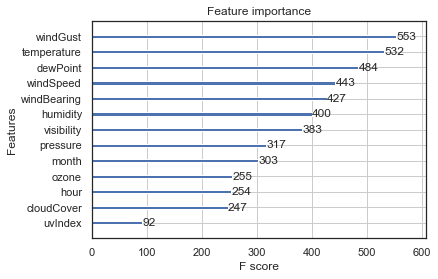

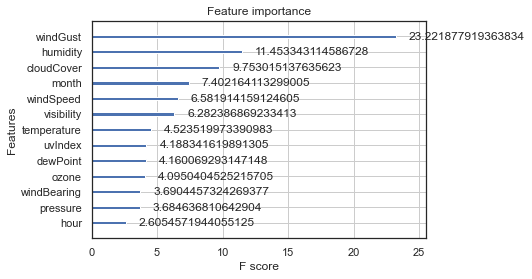

In [35]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain');

In [36]:
roc_auc_score(y_test, gbm.predict(x_test))

0.9640492190376543

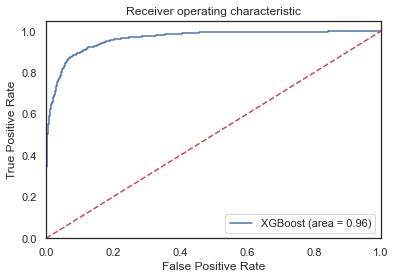

In [37]:
logit_roc_auc = roc_auc_score(y_test, gbm.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict(x_test))
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_XGBoost')
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=123)

param_grid = {
        'max_depth' : [2,3,4,5],
        'min_samples_leaf' : [20,30,40],
        'max_features' : [0.05, 0.10, 0.20, 0.30] ,
        'class_weight' : [{1:0.80, 0:0.20}, {1:0.75, 0:0.25}, {1:0.70, 0:0.30}]
            }

gs = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc')
gs.fit(x_train, y_train)


In [ ]:
gs.best_estimator_


In [ ]:
rf = gs.best_estimator_

In [ ]:
pred = rf.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, pred)

In [ ]:
pred_prob = rf.predict_proba(x_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, pred_prob[:, 1]) 
roc_auc = auc(fpr, tpr)
roc_auc 


In [ ]:
# Plot ROC curve with AUC score

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='b', lw=lw, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_Random_Forest')
plt.show() 

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

feature = x_train 
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



In [ ]:

%matplotlib inline


# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [ ]:
print(metrics.confusion_matrix(y_test, pred))


In [ ]:
print(metrics.classification_report(y_test, pred))